**参考**  
作者：刘烤鸡和李鸭肠  
链接：https://www.jianshu.com/p/5bd5ba1c357d  
来源：简书

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_train = pd.read_csv('./input/pfm_train.csv')
data_train.shape

(1100, 31)

In [5]:
data_test = pd.read_csv('./input/pfm_test.csv')
data_test.shape

(350, 30)

In [6]:
pd.set_option('display.max_columns',None)#显示所有列
pd.set_option('display.max_rows',None)#显示所有行

In [7]:
data = pd.concat([data_train,data_test],axis = 0)

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 349
Data columns (total 31 columns):
Age                         1450 non-null int64
Attrition                   1100 non-null float64
BusinessTravel              1450 non-null object
Department                  1450 non-null object
DistanceFromHome            1450 non-null int64
Education                   1450 non-null int64
EducationField              1450 non-null object
EmployeeNumber              1450 non-null int64
EnvironmentSatisfaction     1450 non-null int64
Gender                      1450 non-null object
JobInvolvement              1450 non-null int64
JobLevel                    1450 non-null int64
JobRole                     1450 non-null object
JobSatisfaction             1450 non-null int64
MaritalStatus               1450 non-null object
MonthlyIncome               1450 non-null int64
NumCompaniesWorked          1450 non-null int64
Over18                      1450 non-null object
OverTime             

其中训练数据主要包括1450条记录，31个字段，主要字段说明如下：  

（1）Age：员工年龄  

（2）Attrition：员工是否已经离职，1表示已经离职，2表示未离职，这是目标预测值；  

（3）BusinessTravel：商务差旅频率，Non-Travel表示不出差，Travel_Rarely表示不经常出差，Travel_Frequently表示经常出差；

（4）Department：员工所在部门，Sales表示销售部，Research & Development表示研发部，Human Resources表示人力资源部；

（5）DistanceFromHome：公司跟家庭住址的距离，从1到29，1表示最近，29表示最远；

（6）Education：员工的教育程度，从1到5，5表示教育程度最高；

（7）EducationField：员工所学习的专业领域，Life Sciences表示生命科学，Medical表示医疗，Marketing表示市场营销，Technical Degree表示技术学位，Human Resources表示人力资源，Other表示其他；

（8）EmployeeNumber：员工号码；

（9）EnvironmentSatisfaction：员工对于工作环境的满意程度，从1到4，1的满意程度最低，4的满意程度最高；

（10）Gender：员工性别，Male表示男性，Female表示女性；

（11）JobInvolvement：员工工作投入度，从1到4，1为投入度最低，4为投入度最高；

（12）JobLevel：职业级别，从1到5，1为最低级别，5为最高级别；

（13）JobRole：工作角色：Sales Executive是销售主管，Research Scientist是科学研究员，Laboratory Technician实验室技术员，Manufacturing Director是制造总监，Healthcare Representative是医疗代表，Manager是经理，Sales Representative是销售代表，Research Director是研究总监，Human Resources是人力资源；

（14）JobSatisfaction：工作满意度，从1到4，1代表满意程度最低，4代表满意程度最高；

（15）MaritalStatus：员工婚姻状况，Single代表单身，Married代表已婚，Divorced代表离婚；

（16）MonthlyIncome：员工月收入，范围在1009到19999之间；

（17）NumCompaniesWorked：员工曾经工作过的公司数；

（18）Over18：年龄是否超过18岁；

（19）OverTime：是否加班，Yes表示加班，No表示不加班；

（20）PercentSalaryHike：工资提高的百分比；

（21）PerformanceRating：绩效评估；

（22）RelationshipSatisfaction：关系满意度，从1到4，1表示满意度最低，4表示满意度最高；

（23）StandardHours：标准工时；

（24）StockOptionLevel：股票期权水平；

（25）TotalWorkingYears：总工龄；

（26）TrainingTimesLastYear：上一年的培训时长，从0到6，0表示没有培训，6表示培训时间最长；

（27）WorkLifeBalance：工作与生活平衡程度，从1到4，1表示平衡程度最低，4表示平衡程度最高；

（28）YearsAtCompany：在目前公司工作年数；

（29）YearsInCurrentRole：在目前工作职责的工作年数

（30）YearsSinceLastPromotion：距离上次升职时长

（31）YearsWithCurrManager：跟目前的管理者共事年数；


In [9]:
data.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1450.000000,1100.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.0,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.00000,1450.000000
mean,36.871724,0.161818,9.177241,2.909655,1026.981379,2.722759,2.731724,2.057931,2.731034,6482.624138,2.685517,15.226897,3.154483,2.708276,80.0,0.795172,11.217241,2.801379,2.761379,6.956552,4.220000,2.16000,4.097931
std,9.119033,0.368451,8.085783,1.023925,602.029616,1.090314,0.711068,1.103084,1.103074,4694.115546,2.496457,3.668111,0.361536,1.082390,0.0,0.853752,7.738772,1.292009,0.706588,6.053036,3.617954,3.18867,3.546603
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,494.250000,2.000000,2.000000,1.000000,2.000000,2909.500000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.00000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1023.000000,3.000000,3.000000,2.000000,3.000000,4903.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.00000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1559.500000,4.000000,3.000000,3.000000,4.000000,8339.750000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.75000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.00000,17.000000


In [10]:
for i in data_train.columns:
    if data_train[i].dtype == 'int64':
        print(i + ':')
        print((data_train[data_train['Attrition'] == 1.0][i].value_counts()/data_train[i].value_counts()).sort_values(ascending = False))
        print('-----------------------')

Age:
21    0.714286
19    0.625000
20    0.500000
58    0.428571
22    0.416667
23    0.400000
26    0.322581
28    0.285714
29    0.272727
31    0.270833
33    0.255319
25    0.250000
24    0.222222
30    0.187500
44    0.181818
55    0.176471
32    0.170213
39    0.166667
52    0.166667
41    0.161290
56    0.153846
53    0.153846
34    0.132075
47    0.125000
51    0.125000
46    0.120000
35    0.118644
37    0.108108
49    0.090909
36    0.072727
45    0.066667
40    0.063830
42    0.058824
27    0.052632
38    0.051282
50    0.043478
43    0.040000
18         NaN
48         NaN
54         NaN
57         NaN
59         NaN
60         NaN
Name: Age, dtype: float64
-----------------------
Attrition:
1    1.0
0    NaN
Name: Attrition, dtype: float64
-----------------------
DistanceFromHome:
12    0.428571
24    0.400000
22    0.333333
13    0.294118
27    0.272727
25    0.263158
16    0.230769
29    0.217391
20    0.210526
17    0.200000
23    0.200000
9     0.189655
11    0.181818
3 

In [11]:
for i in data_train.columns:
    if data_train[i].dtype == 'O':
        print(i + ':')
        print((data_train[data_train['Attrition'] == 1.0][i].value_counts()/data_train[i].value_counts()).sort_values(ascending=False))
        print('-----------------------')

BusinessTravel:
Travel_Frequently    0.224390
Travel_Rarely        0.156290
Non-Travel           0.083333
Name: BusinessTravel, dtype: float64
-----------------------
Department:
Human Resources           0.214286
Sales                     0.202417
Research & Development    0.140303
Name: Department, dtype: float64
-----------------------
EducationField:
Human Resources     0.315789
Technical Degree    0.239130
Marketing           0.212598
Life Sciences       0.151515
Medical             0.136499
Other               0.111111
Name: EducationField, dtype: float64
-----------------------
Gender:
Male      0.166922
Female    0.154362
Name: Gender, dtype: float64
-----------------------
JobRole:
Sales Representative         0.403509
Human Resources              0.272727
Laboratory Technician        0.209756
Research Scientist           0.185520
Sales Executive              0.170040
Manufacturing Director       0.079208
Manager                      0.062500
Healthcare Representative    0.050

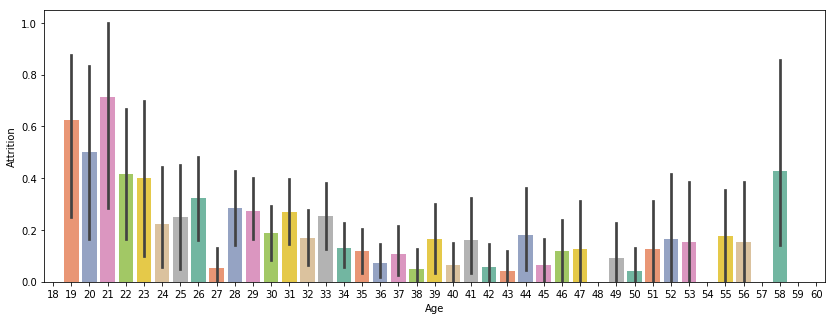

In [12]:
plt.figure(figsize=(14,5))
sns.barplot(x='Age', y='Attrition', data = data , palette = 'Set2')

根据常识，年龄是一个员工离职的重要因素，往往随着年纪的增大，员工的稳定性更好，离职的倾向更小。所以进行作图，可以看出24之前和58岁的人员流动很大，而在年龄分段之内离职倾向不大，趋于缓和，部分的特数值没有离职人员。

In [13]:
def resetAge(name):
    if (name < 24) & (name > 18) & (name == 58):
        return 1
    elif (name == 18) & (name == 48) & (name == 54) & (name == 57) & (name > 58) :
        return 0
    else:
        return 2

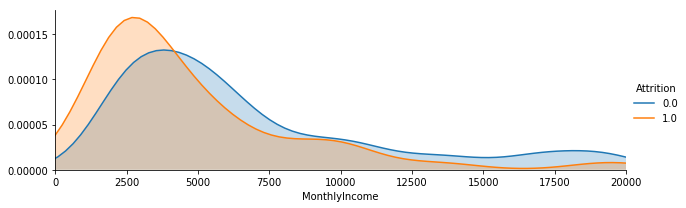

In [14]:
facet = sns.FacetGrid(data,hue = 'Attrition' ,aspect=3)#aspect纵横比，是说每个小图的横轴长度和纵轴的比
facet.map(sns.kdeplot,'MonthlyIncome',shade = True)
facet.set(xlim=(0,data['MonthlyIncome'].max()))
facet.add_legend()

In [15]:
def resetSalary(s):
    if s>0 & s<3725:
        return 0
    elif s>=3725 & s<11250:
        return 1
    else:
        return 2

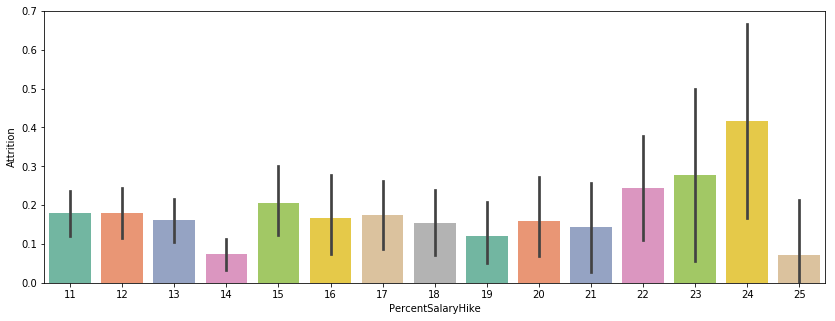

In [16]:
plt.figure(figsize=(14,5))
sns.barplot(x='PercentSalaryHike', y='Attrition', data = data , palette = 'Set2')

In [17]:
def resetPerHike(s):
    if s >= 22 & s < 25:
        return 0
    elif (s >= 11 & s < 14) | (s > 14 & s < 22):
        return 1
    else:
        return 2

In [18]:
data['PercentSalaryHike'] = data['PercentSalaryHike'].apply(resetPerHike)
data['MonthlyIncome'] = data['MonthlyIncome'].apply(resetSalary)
data['Age'] = data['Age'].apply(resetAge)  

In [19]:
cata_result = pd.DataFrame()
for i in data.columns:
    if data[i].dtype == 'O':
        cata = pd.DataFrame()
        cata = pd.get_dummies(data[i],prefix=i)
        cata_result = pd.concat([cata_result,cata],axis=1)

In [20]:
for i in data.columns:
    if data[i].dtype == 'O':
        data = data.drop(i,axis=1)

In [21]:
data = pd.concat([data,cata_result],axis=1)

In [22]:
data = data.drop(['StandardHours','Over18_Y','EmployeeNumber'],axis =1)

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

sep = 1100
X = data.iloc[0:sep,:].drop('Attrition',axis = 1)
y = data.iloc[0:sep,:]['Attrition']
data_test_use = data.iloc[sep:,:]
data_test_use1 = data_test_use.drop('Attrition',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

model = {}
model['LR'] = LogisticRegression()
model['svm'] = svm.SVC()
#设置随机森林系数
model['RMF'] = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
model['CART'] = DecisionTreeClassifier()
model['KNN'] = KNeighborsClassifier()
for i in model:
    model[i].fit(X,y)
    score = cross_val_score(model[i],X,y,cv=5,scoring='accuracy')
    print("%s:%.3f(%.3f)"%(i,score.mean(),score.std()))

E:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


LR:0.875(0.014)
svm:0.843(0.005)
RMF:0.852(0.006)
CART:0.792(0.016)
KNN:0.829(0.010)


In [24]:
result = (model['LR'].predict(data_test_use1)).astype('int')

In [25]:
data_predict = pd.DataFrame()

In [26]:
data_predict['result'] = result

In [28]:
data_predict.to_csv('./result/sample.csv',index=None)

In [29]:
import xgboost as xgb
xgb_train = xgb.DMatrix(data=X,label=y)
Trate = 0.25

#参数调整
params = {'booster':'gbtree',
              'eta':0.1,
             'max_delta_step':0,
             'subsample':0.9,
             'colsample_bytree':0.9,
             'base_score':Trate,
             'objective':'binary:logistic',
             'lambda':5,
             'alpha':8,
             'random_seed':100
         }
#评分方式为auc
params['eval_metric'] = 'auc'

xgb_model = xgb.train(params,xgb_train,num_boost_round=200,maximize = True,verbose_eval=True)

#用xgboost训练好的模型进行预测
res = xgb_model.predict(xgb.DMatrix(data_test_use1))

#因为最终的结果是为0和1的概率，所以进行转换
for i in range(len(res)):
    if res[i] < 0.5:
        res[i] = 0
    else:
        res[i] = 1

E:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
E:\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [31]:
res = res.astype('int')
data_predict1 = pd.DataFrame()
data_predict1['result'] = res
data_predict1.to_csv('./result/sample_xgb.csv',index=None)